# Change in movie genre development trends since 1970
### Analysis based on IMDB data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the main file

In [2]:
data_set = pd.read_csv('IMDB data.tsv', sep='\t',low_memory=False)
data_set.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


Filtering the data to only contain movie type

In [3]:
movies= data_set[data_set.loc[:,'titleType']=='movie']
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"


Filtering out the extra columns to have the genre and release date only

In [4]:
genre_yr = movies.loc[:,['startYear','genres']]
genre_yr.head()

,startYear,genres
8,1894,Romance
145,1897,"Documentary,News,Sport"
332,1900,"Biography,Drama"
499,1905,\N
571,1906,"Biography,Crime,Drama"


Checking if there are rows with missing data

In [5]:
genre_yr.isnull().any()

startYear    False
genres       False
dtype: bool

Finding the total types of genres avaible

In [6]:
temp = genre_yr['genres'].str.split(',',expand = True)
all_genres = pd.unique(temp[:].values.ravel('K'))
all_genres

array(['Romance', 'Documentary', 'Biography', '\\N', 'Drama', 'Adventure',
       'Comedy', 'Crime', 'War', 'Sci-Fi', 'History', 'Western',
       'Fantasy', 'Action', 'Horror', 'Thriller', 'Mystery', 'Animation',
       'Music', 'Musical', 'Sport', 'Family', 'Film-Noir', 'Adult',
       'News', 'Game-Show', 'Reality-TV', 'Talk-Show', 'Short', None],
      dtype=object)

Deleting rows with genre '\\N' and None

In [7]:
temp = genre_yr[genre_yr.loc[:,'genres']=='\\N']
genre_yr = genre_yr.drop(temp.index)
temp = genre_yr[genre_yr.loc[:,'genres']==None]
genre_yr = genre_yr.drop(temp.index)

Checking the total genres again

In [8]:
temp = genre_yr['genres'].str.split(',',expand = True)
all_genres = pd.unique(temp[:].values.ravel('K'))
all_genres

array(['Romance', 'Documentary', 'Biography', 'Drama', 'Adventure',
       'Comedy', 'Crime', 'War', 'Sci-Fi', 'History', 'Western',
       'Fantasy', 'Action', 'Horror', 'Thriller', 'Mystery', 'Animation',
       'Music', 'Musical', 'Sport', 'Family', 'Film-Noir', 'Adult',
       'News', 'Game-Show', 'Reality-TV', 'Talk-Show', 'Short', None],
      dtype=object)

Counting the total number of movies by year in each genre

In [9]:
TMG = pd.DataFrame() #Total Movie Genre by year
for i in range(28):
    temp = genre_yr[genre_yr['genres'].str.contains(all_genres[i])]
    
    TMG[all_genres[i]] = temp.groupby(['startYear']).genres.count()

Checking the value of TMG

In [10]:
TMG.head()

,Romance,Documentary,Biography,Drama,Adventure,Comedy,Crime,War,Sci-Fi,History,...,Musical,Sport,Family,Film-Noir,Adult,News,Game-Show,Reality-TV,Talk-Show,Short
startYear,,,,,,,,,,,,,,,,,,,,,
1894,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1898,1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1908,1,5.0,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909,1,16.0,1.0,10.0,1.0,5.0,1.0,3.0,NaN,1.0,...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1910,1,24.0,1.0,21.0,2.0,4.0,2.0,1.0,NaN,3.0,...,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filtering out movies before 1970

In [11]:
TMG = TMG.drop(TMG.index[:64])
TMG.head()

,Romance,Documentary,Biography,Drama,Adventure,Comedy,Crime,War,Sci-Fi,History,...,Musical,Sport,Family,Film-Noir,Adult,News,Game-Show,Reality-TV,Talk-Show,Short
startYear,,,,,,,,,,,,,,,,,,,,,
1970,357,313.0,32.0,1383.0,267.0,650.0,236.0,107.0,36.0,49.0,...,117.0,23.0,99.0,NaN,123.0,NaN,NaN,NaN,NaN,NaN
1971,297,292.0,31.0,1288.0,238.0,613.0,254.0,75.0,38.0,59.0,...,95.0,15.0,76.0,NaN,230.0,1.0,NaN,NaN,NaN,1.0
1972,282,263.0,33.0,1259.0,229.0,619.0,288.0,59.0,37.0,54.0,...,96.0,28.0,121.0,NaN,171.0,2.0,NaN,NaN,1.0,NaN
1973,240,268.0,45.0,1267.0,194.0,591.0,332.0,70.0,32.0,66.0,...,68.0,22.0,102.0,NaN,201.0,NaN,NaN,NaN,NaN,NaN
1974,284,281.0,32.0,1244.0,194.0,637.0,284.0,65.0,36.0,46.0,...,77.0,17.0,110.0,NaN,185.0,NaN,NaN,NaN,NaN,NaN


In [12]:
TMG.tail()

,Romance,Documentary,Biography,Drama,Adventure,Comedy,Crime,War,Sci-Fi,History,...,Musical,Sport,Family,Film-Noir,Adult,News,Game-Show,Reality-TV,Talk-Show,Short
startYear,,,,,,,,,,,,,,,,,,,,,
2017,966,6398.0,751.0,5698.0,673.0,2880.0,762.0,157.0,445.0,522.0,...,185.0,233.0,625.0,NaN,55.0,43.0,1.0,19.0,4.0,2.0
2018,848,3983.0,476.0,5290.0,587.0,2649.0,715.0,120.0,513.0,329.0,...,145.0,159.0,500.0,NaN,49.0,22.0,NaN,9.0,5.0,NaN
2019,41,495.0,53.0,396.0,86.0,175.0,73.0,13.0,66.0,31.0,...,14.0,12.0,32.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN
2020,1,1.0,NaN,7.0,16.0,10.0,2.0,NaN,8.0,NaN,...,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
\N,1947,2168.0,1284.0,15400.0,2562.0,7465.0,2451.0,500.0,2770.0,746.0,...,348.0,385.0,1078.0,NaN,92.0,11.0,1.0,19.0,5.0,NaN


Filtering out upcoming movie dates, i.e. 2018 onwards

In [13]:
TMG = TMG.drop(TMG.index[-4:])
TMG.tail()

,Romance,Documentary,Biography,Drama,Adventure,Comedy,Crime,War,Sci-Fi,History,...,Musical,Sport,Family,Film-Noir,Adult,News,Game-Show,Reality-TV,Talk-Show,Short
startYear,,,,,,,,,,,,,,,,,,,,,
2013,1019,5596.0,1286.0,5290.0,787.0,2623.0,711.0,117.0,356.0,904.0,...,140.0,273.0,883.0,NaN,56.0,324.0,3.0,9.0,4.0,NaN
2014,1127,5991.0,1402.0,5404.0,795.0,2788.0,725.0,174.0,356.0,938.0,...,148.0,275.0,889.0,NaN,59.0,340.0,1.0,8.0,5.0,NaN
2015,1046,6035.0,977.0,5389.0,697.0,2722.0,723.0,169.0,396.0,680.0,...,152.0,248.0,689.0,NaN,52.0,165.0,NaN,19.0,11.0,NaN
2016,1040,6150.0,841.0,5509.0,697.0,2814.0,853.0,162.0,384.0,567.0,...,158.0,277.0,614.0,NaN,41.0,61.0,1.0,18.0,8.0,NaN
2017,966,6398.0,751.0,5698.0,673.0,2880.0,762.0,157.0,445.0,522.0,...,185.0,233.0,625.0,NaN,55.0,43.0,1.0,19.0,4.0,2.0


Plotting the graph of a movie genres over years}

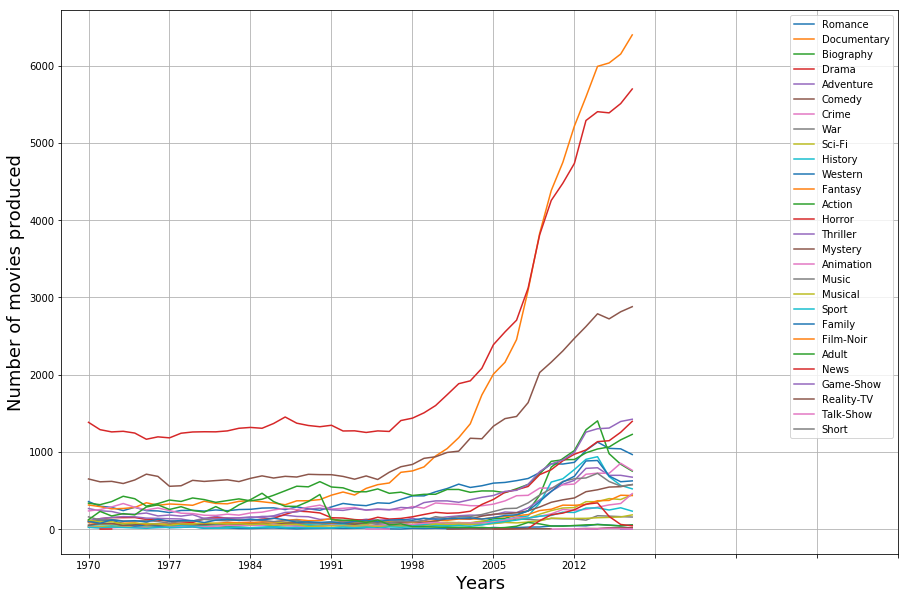

In [14]:
plt.figure(figsize=(15,10))
plt.plot(TMG)

plt.xticks(np.arange(0,75, step =7))
plt.legend(all_genres)
plt.yscale(value= 'linear')
plt.ylabel('Number of movies produced', rotation = 'vertical', size = 18)
plt.xlabel('Years', size = 18)
plt.grid(True)
plt.show()

### Comparing the number of films per genre in 2000 vs 2017

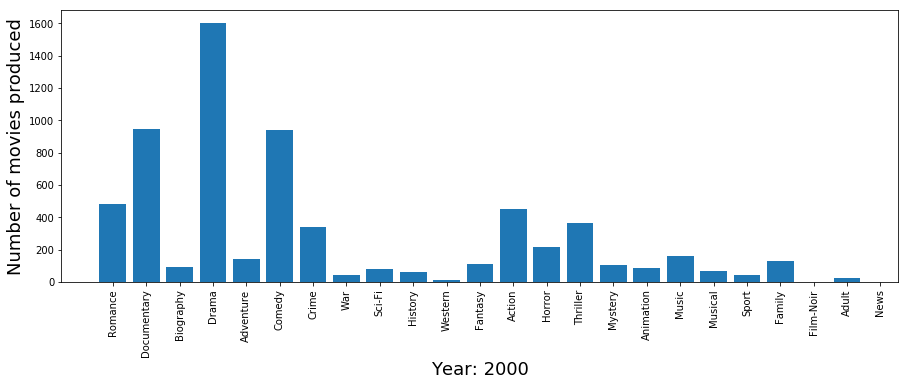

In [15]:
plt.figure(figsize=(15,5))
plt.bar(['Romance', 'Documentary', 'Biography', 'Drama', 'Adventure',
       'Comedy', 'Crime', 'War', 'Sci-Fi', 'History', 'Western',
       'Fantasy', 'Action', 'Horror', 'Thriller', 'Mystery', 'Animation',
       'Music', 'Musical', 'Sport', 'Family', 'Film-Noir', 'Adult',
       'News', 'Game-Show', 'Reality-TV', 'Talk-Show', 'Short'],height = TMG.iloc[30,:])
plt.xticks(fontsize=10,rotation='vertical')
plt.ylabel('Number of movies produced', rotation = 'vertical', size = 18)
plt.xlabel('Year: 2000', size = 18)
plt.show()


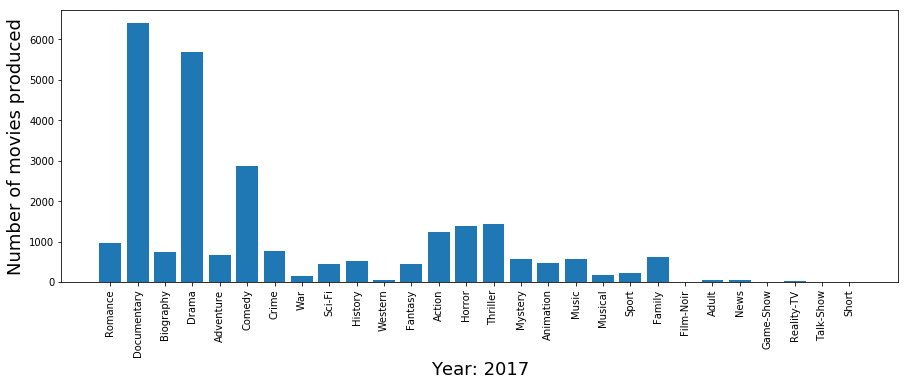

In [16]:

plt.figure(figsize=(15,5))
plt.bar(['Romance', 'Documentary', 'Biography', 'Drama', 'Adventure',
       'Comedy', 'Crime', 'War', 'Sci-Fi', 'History', 'Western',
       'Fantasy', 'Action', 'Horror', 'Thriller', 'Mystery', 'Animation',
       'Music', 'Musical', 'Sport', 'Family', 'Film-Noir', 'Adult',
       'News', 'Game-Show', 'Reality-TV', 'Talk-Show', 'Short'],height = TMG.iloc[-1,:])
plt.ylabel('Number of movies produced', rotation = 'vertical', size = 18)
plt.xlabel('Year: 2017', size = 18)

plt.xticks(fontsize=10,rotation='vertical')

plt.show()

Combining the Two bar graphs for a better understanding.

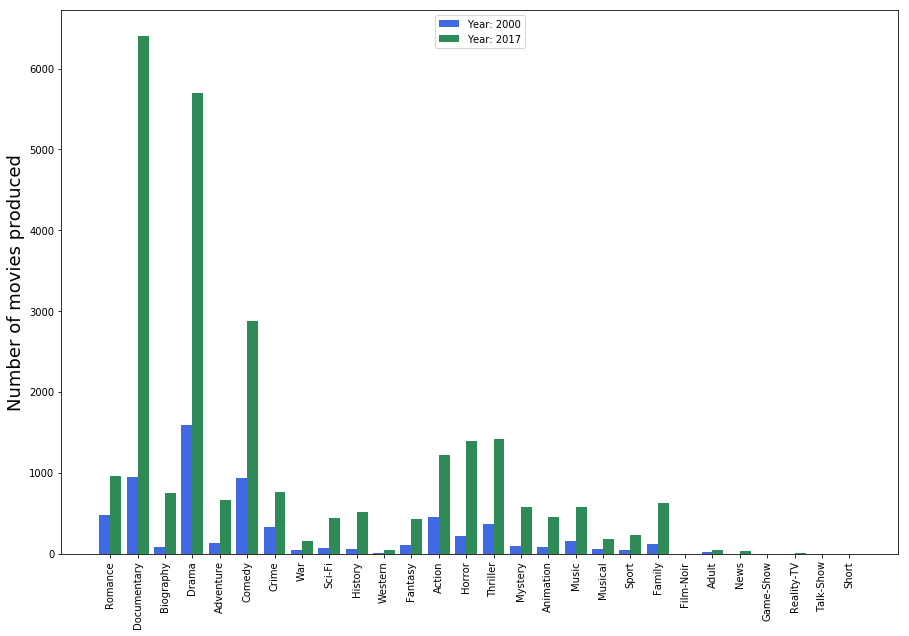

In [17]:
labels = ['Romance', 'Documentary', 'Biography', 'Drama', 'Adventure',
       'Comedy', 'Crime', 'War', 'Sci-Fi', 'History', 'Western',
       'Fantasy', 'Action', 'Horror', 'Thriller', 'Mystery', 'Animation',
       'Music', 'Musical', 'Sport', 'Family', 'Film-Noir', 'Adult',
       'News', 'Game-Show', 'Reality-TV', 'Talk-Show', 'Short']
y2000 = TMG.iloc[30,:]
ind = np.arange(28)
width = 0.4

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, y2000, width, color='royalblue')


y2017 = TMG.iloc[-1,:]
rects2 = ax.bar(ind+width, y2017, width, color='seagreen')

fig.set_size_inches(15, 10)
fig.savefig('test2png.png', dpi=200)

ax.set_ylabel('Number of movies produced', rotation = 'vertical', size = 18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels, rotation='vertical')

ax.legend((rects1[0], rects2[0]), ('Year: 2000', 'Year: 2017'))

plt.show()


Deleting outliers

In [18]:
del TMG['Documentary']
del TMG['Drama']

<function matplotlib.pyplot.show(*args, **kw)>

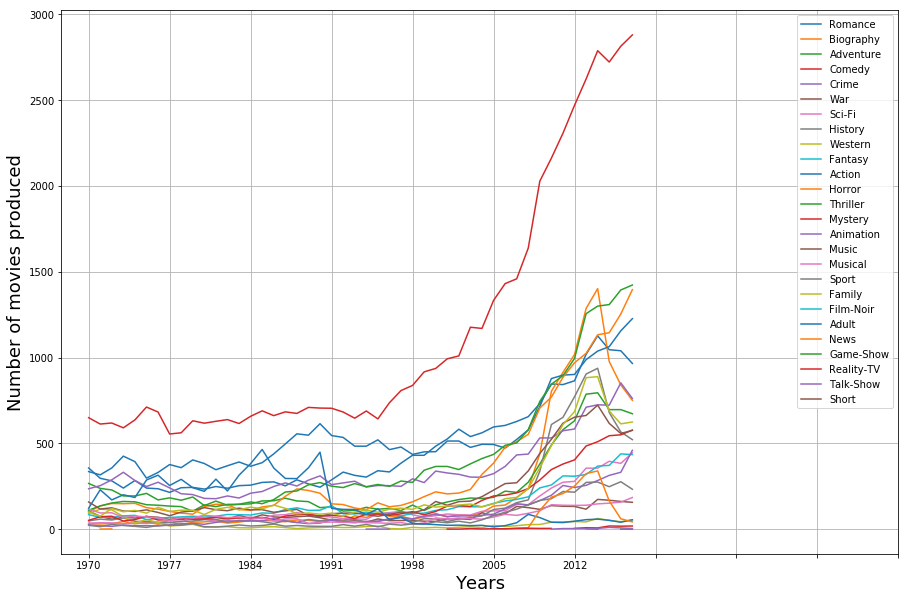

In [19]:
plt.figure(figsize=(15,10))
plt.plot(TMG)

plt.xticks(np.arange(0,75, step =7))
plt.legend(['Romance','Biography', 'Adventure',
       'Comedy', 'Crime', 'War', 'Sci-Fi', 'History', 'Western',
       'Fantasy', 'Action', 'Horror', 'Thriller', 'Mystery', 'Animation',
       'Music', 'Musical', 'Sport', 'Family', 'Film-Noir', 'Adult',
       'News', 'Game-Show', 'Reality-TV', 'Talk-Show', 'Short'])
plt.ylabel('Number of movies produced', rotation = 'vertical', size = 18)
plt.xlabel('Years', size = 18)
plt.grid(True)
plt.show

## Plotting the well known genres.

<function matplotlib.pyplot.show(*args, **kw)>

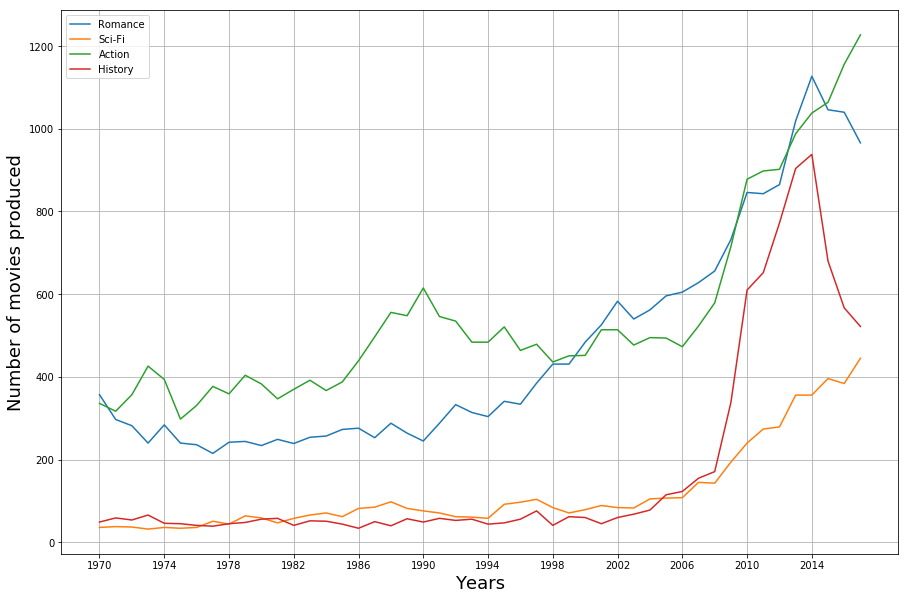

In [20]:
plt.figure(figsize=(15,10))
plt.plot(TMG.loc[:,['Romance','Sci-Fi','Action','History']])

plt.xticks(np.arange(0,47, step =4))
plt.legend(['Romance','Sci-Fi','Action','History'])
plt.grid(True)
plt.ylabel('Number of movies produced', rotation = 'vertical', size = 18)
plt.xlabel('Years', size = 18)
plt.show